<class 'numpy.ndarray'>
(768, 768, 3)
After resizing: (256, 256, 3)
After trimming: (256, 256)
After gray: (768, 768)
3.5026392005497646
-2.862545408985796
3072.0
Min SNR =[0.6262594]
Max SNR =[37072.31912464]
2910
PSNR = 21.327384835508518 dB
Rasio Kompresi =12.5%


Text(0.5, 1.0, 'Citra Rek')

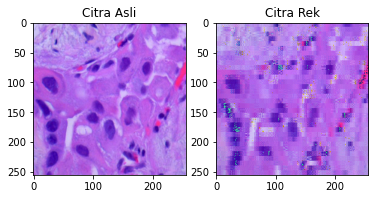

In [58]:
# import sys
# sys.modules[__name__].__dict__.clear()
# %reset_selective [-f]
%reset -f
from PIL import Image
from numpy import asarray
import numpy as np
from matplotlib import pyplot
from scipy.fftpack import dct 
import math as mt
from scipy.fft import dctn, idctn
from scipy.io import savemat,loadmat

# del img_rz
# del img_rr
x='lungaca1.jpeg'
# load the image
image = Image.open(x)


data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# pyplot.imshow(image)

img_rz = np.array(image.resize((256,256)))
Image.fromarray(img_rz).save('lungaca1_edit.jpeg')
print("After resizing:",img_rz.shape)

img_rz = np.float64(np.array(image.resize((256,256))))


im_trim = data[128:384, 128:384,2]
print("After trimming:",im_trim.shape)



# pyplot.imshow(im_trim)


img = np.mean(data, axis=2)
print("After gray:",img.shape)
# pyplot.imshow(im_trim,cmap = pyplot.get_cmap(name = 'gray'))

persen=0.125
windowsize_r = 8
windowsize_c = 8
L=windowsize_r*windowsize_c
# wid=img
M=round(persen*windowsize_r*windowsize_c)

AA=np.random.normal(0,1,(M,L))
# print("A1="+str(AA))
print(np.max(np.max(AA)))
print(np.min(np.min(AA)))
md={'A':AA}
savemat("dataA.mat", md)

data_dict=loadmat("dataA.mat")
# import mat73
# data_dict = mat73.loadmat('dataA.mat')
# print("AA="+str(data_dict['A']))

import recons

# print(img_rz.shape[2])
# xx=img_rz
# img_rr=img_rz
print(img_rz.shape[0]*img_rz.shape[1]*3/L)
y=np.ones((M,round(img_rz.shape[0]*img_rz.shape[1]*3/L)))
# print(y.shape)
img_rr=np.ones((img_rz.shape[0],img_rz.shape[1],img_rz.shape[2]))
ind=0
A1=AA
snr=np.ones((1,img_rz.shape[0]*img_rz.shape[1]*img_rz.shape[2]))

# print(A1)
# pyplot.imshow(img_rz)
# Crop out the window and calculate the histogram
for i in range(0,img_rz.shape[2],1):
    for r in range(0,img_rz.shape[0] , windowsize_r):
        for c in range(0,img_rz.shape[1] , windowsize_c):
#         for i in range(0,img_rz.shape[2],1):
#         for i in range(0,1,1):
# for r in range(0,1 , windowsize_r):
#     for c in range(0,1 , windowsize_c):
#         for i in range(0,1,1):
            w = img_rz[r:r+windowsize_r,c:c+windowsize_c,i]
#         print(w.shape)
            wid1=w.reshape(windowsize_r*windowsize_c,1)
            wd2=dctn(w[:,:])
            wd=wd2.reshape(windowsize_r*windowsize_c,1)
#             print(wd)

#             wdc=wd[0:M,:]
#             z=np.zeros((windowsize_r*windowsize_c-M,1))
#             wda=np.concatenate((wdc,z),axis=0)#menggabungkan matriks ke bawah (axis=0)
            
#             print(wd.shape)
#             print(A.shape)
#             print(ind)
#             print(M)
            data_dict=loadmat("dataA.mat")
            AA=data_dict['A']
            y[0:M,ind:ind+1]=np.dot(AA,wd)
#             print("A1="+str(A1))

            Y=y[0:M,ind:ind+1]
#             print(np.sum(Y))
#             print(ind)
#             Y.shape
#             print(AA)
#             print(AA)
            hat_x1=recons.omp(Y,AA)
            snr[0,ind]=np.mean(np.mean(wd**2))/np.mean(np.mean((wd-hat_x1.T)**2))
#             print(AA)
#             print(img_rz.shape[2])
        
#             print(hat_x1)
#             s=mt.ceil(len(y[0:M,:ind+1]))
#             for k in range(0,s,1):
#                 pr=abs(np.dot(A.T,Y))
# #                 print(pr)
#                 x=np.argmax(pr)
#                 print(x)
                
            hat_xt=hat_x1.reshape(windowsize_r*windowsize_c,1)
            
            ind=ind+1
            #         wr=w[:,:,1].reshape(windowsize_r*windowsize_c,1);
#         wd=dct(wr)
#         print("r="+str(r)+", c="+str(c)+", ukuran wd:"+str(wd.shape))
#             print("i="+str(i))
            
            wdir=(hat_x1.T).reshape(windowsize_r,windowsize_c)
#             wdir=wd.reshape(windowsize_r,windowsize_c)

#             wdir=wda.reshape(windowsize_r,windowsize_c)
            wid=idctn(wdir)
            img_rr[r:r+windowsize_r,c:c+windowsize_c,i]=wid
#         print(np.sum(snr>20))
        if np.sum(snr>20)<2:
            print("Jelek")
            break
    if np.sum(snr>20)<2:
        break
            
            
#             print(wd2)
#             print(wdir)
#         pyplot.imshow(wid)
            
#             if (i>2)  :
#                 break 
      
#         if (c>=0)&(r>=0)  :
#             break
#     if (c>=0)&(r>=0)  :
#         break
print("Min SNR ="+str(min(snr.T)))
print("Max SNR ="+str(max(snr.T)))
# print(snr.shape)
print(np.sum(snr>20))
# hat_x1.shape
# wd.shape
# print("Ukuran hat_x ="+str(hat_x1.shape))
# print("Ukuran wd ="+str(wd.shape))
# print(A1)
# print("Ukuran y = "+str(Y.shape))
# print(len(y[0:M,1]))

# print(hat_x1)

# img_rz = np.array(image.resize((256,256)))
I0 = img_rz.astype(np.uint8)
I = img_rr.astype(np.uint8)
mse=np.mean(np.mean((I-img_rz)**2))
# print(mse)
psnr=10*mt.log10(255**2/mse)
print("PSNR = "+str(psnr)+" dB")
# print("M = "+str(M))

# pyplot.imshow(img_rz)
print("Rasio Kompresi ="+str(persen*100)+"%")


# fig, axs = pyplot.subplots(1,2)
# axs[0].imshow(img_rz)
# axs[0].set_title('Asli')
# axs[1].set_title('Reconstruction')
# axs[1].imshow(I)

# wda.shape
# z.shape
# img_rz.dtype
# img_rr.dtype

# A=np.random.normal(0,1,(5,5))
# print("Ukuran wd2 ="+str(wd2.shape))


fig, axs = pyplot.subplots(1,2)
# axs[0].plot(wid1)
# axs[0].set_title('Masukan DCT2, bukan sparse')
# axs[1].set_title('Keluaran DCT2, sudah sparse')
# axs[1].plot(wd)
# axs[2].set_title('Rek. CS')
# axs[2].plot(hat_x1)

# print(hat_x1)
# img_rz.dtype
# y.dtype
# print(A1)

axs[0].imshow(I0)
axs[0].set_title('Citra Asli')
axs[1].imshow(I)
axs[1].set_title('Citra Rek')

# axs[0].plot(wd)
# axs[0].set_title('Citra Asli')
# axs[1].plot(hat_xt)
# axs[1].set_title('Citra Rek')


# print(A1)
# A1.dtype



In [ ]:
!pip install mat73
# !pip install ipynb
# pip install opencv-python

In [ ]:
import cv2
import numpy as np
from PIL import Image

# img_file = "sample.jpg"
image = cv2.imread(x)

# USING NUMPY SLICE
red = image[:,:,2]
green = image[:,:,1]
blue = image[:,:,0]

pyplot.imshow(blue)

from numpy import linalg as LA



def omp(y0,A0):
    s=mt.ceil(len(y0))
    # print(s)
    a=np.zeros((A0.shape[0],0))
    pos=np.zeros((1,s))
    r_n=y0
#     print(np.sum(r_n))
    if np.sum(r_n)==0:
        hat_x=np.zeros((1,A0.shape[1]))
        return hat_x
    # s=2
    for k in range(0,s,1):
        pr=abs(np.dot(A0.T,r_n))
    #     print(pr)
        posx=np.argmax(pr)
#         A.shape
#         y.shape
        a=np.column_stack((a,A0[:,posx]))
        A0[:,posx]=np.zeros((1,y0.shape[0]))
        aa=np.dot(a.T,a)
    #     print(aa)
#         print(y)
#         y.shape
        pangkat=LA.matrix_power(aa,-1)
        aug_x=np.dot(np.dot(pangkat,a.T),y0)    
        r_n=y0-np.dot(a,aug_x)
    #     print(k)
        pos[0,k]=posx

    hat_x=np.zeros((1,A0.shape[1]))
    for k in range(0,len(aug_x),1):
    #     print(pos[0,k])
        hat_x[0,round(pos[0,k])]=aug_x[k]
#     print(A)
#     print("Ukuran A ="+str(A.shape))
    return hat_x




# def omp(y,A):
#     s=mt.ceil(len(y))
#     # print(s)
#     a=np.zeros((A.shape[0],0))
#     pos=np.zeros((1,s))
#     r_n=y
# #     print(np.sum(r_n))
#     if np.sum(r_n)==0:
#         hat_x=np.zeros((1,A.shape[1]))
#         return hat_x
#     # s=2
#     for k in range(0,s,1):
#         pr=abs(np.dot(A.T,r_n))
#     #     print(pr)
#         posx=np.argmax(pr)
# #         A.shape
# #         y.shape
#         a=np.column_stack((a,A[:,posx]))
#         A[:,posx]=np.zeros((1,y.shape[0]))
#         aa=np.dot(a.T,a)
#     #     print(aa)
# #         print(y)
# #         y.shape
#         pangkat=LA.matrix_power(aa,-1)
#         aug_x=np.dot(np.dot(pangkat,a.T),y)    
#         r_n=y-np.dot(a,aug_x)
#     #     print(k)
#         pos[0,k]=posx

#     hat_x=np.zeros((1,A.shape[1]))
#     for k in range(0,len(aug_x),1):
#     #     print(pos[0,k])
#         hat_x[0,round(pos[0,k])]=aug_x[k]
# #     print(A)
# #     print("Ukuran A ="+str(A.shape))
#     return hat_x



In [ ]:
y=np.array([[1,2,3,4],[1,1,0,0]])
A=np.array([[1,2,3,4],[1,1,0,0]])
wdc=np.array([[1],[-2],[0],[-1]])

y[0:2,0:1]=np.dot(A,wdc)
# y[0:2,0]=100
print(y.shape)
# import numpy as numpy

# grey_levels = 256
# # Generate a test image
# test_image = numpy.random.randint(0,grey_levels, size=(11,11))

# # Define the window size
# windowsize_r = 5
# windowsize_c = 5

# # Crop out the window and calculate the histogram
# for r in range(0,test_image.shape[0] - windowsize_r, windowsize_r):
#     for c in range(0,test_image.shape[1] - windowsize_c, windowsize_c):
#         window = test_image[r:r+windowsize_r,c:c+windowsize_c]
#         hist = numpy.histogram(window,bins=grey_levels)



# def name():
#     return "John","Armin"

# # print the tuple with the returned values
# print(name())

# # get the individual items
# name_1, name_2 = name()
# print(name_1, name_2)

In [ ]:
pr=np.array([1,2,3,4,5,3,2,1])
x=np.argmax(pr)
print(max(pr))
print(x)

In [ ]:
a = np.array((0, 1))
b = np.array((2, 1))
c = np.array((-1, -1))
x=np.column_stack((a,b,c))
x.shape
print(a)
print(x)


In [ ]:
from numpy import linalg as LA
persen=0.125/2
windowsize_r = 2
windowsize_c = 2
L=windowsize_r*windowsize_c
# wid=img
M=round(persen*windowsize_r*windowsize_c)
M=2
# A=np.random.normal(0,1,(M,L))
A=np.array([[-0.5377,  -1.2588,   3.188,   -0.4336],
    [0.8339,    0.8622,   -1.3077,    -0.3426]])

# print(A.shape)


x=np.array([1,0.5,0.1,0]).T[:, np.newaxis]
# x1=np.transpose(x)
# print(x)
# print(np.shape(x))
y=np.dot(A,x)

s=mt.ceil(len(y))
# print(s)
a=np.zeros((A.shape[0],0))
pos=np.zeros((1,s))
r_n=y
# s=2
for k in range(0,s,1):
    pr=abs(np.dot(A.T,r_n))
#     print(pr)
    posx=np.argmax(pr)
    a=np.column_stack((a,A[:,posx]))
    A[:,posx]=np.zeros((1,y.shape[0]))
    aa=np.dot(a.T,a)
#     print(aa)
    pangkat=LA.matrix_power(aa,-1)
    aug_x=np.dot(np.dot(pangkat,a.T),y)    
    r_n=y-np.dot(a,aug_x)
#     print(k)
    pos[0,k]=posx
    
hat_x=np.zeros((1,A.shape[1]))
for k in range(0,len(aug_x),1):
#     print(pos[0,k])
    hat_x[0,round(pos[0,k])]=aug_x[k]

# pos[0,0]=posx  
print(pr)
print(aa)
print(a)
print(k)
print(posx)
print(aug_x)
print(r_n)
print(A)
print(pos)
print(hat_x)
print(s)
# y.shape[0]

In [ ]:
a=np.zeros((3,0))
b=np.array([1,2,3]).T
a=np.column_stack((a,b))
print(a)
a=np.column_stack((a,b))
print(a)


In [ ]:
print(A.shape[1])